In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('./dataset/auto.csv')

<h1>Limpeza de dados</h1>

In [20]:
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
0,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,115,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,115,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   3            204 non-null    int64  
 1   ?            204 non-null    int64  
 2   alfa-romero  204 non-null    object 
 3   gas          204 non-null    object 
 4   std          204 non-null    object 
 5   two          202 non-null    object 
 6   convertible  204 non-null    object 
 7   rwd          204 non-null    object 
 8   front        204 non-null    object 
 9   88.6         204 non-null    float64
 10  168.8        204 non-null    float64
 11  64.1         204 non-null    float64
 12  48.8         204 non-null    float64
 13  2548         204 non-null    int64  
 14  dohc         204 non-null    object 
 15  four         204 non-null    object 
 16  130          204 non-null    int64  
 17  mpfi         204 non-null    object 
 18  3.47         200 non-null    object 
 19  2.68    

In [19]:
col_names = ['symboling',
             'normalized-losses',
             'make', 
             'fuel-type', 
             'aspiration', 
             'num-of-doors', 
             'body-style', 
             'drive-wheels', 
             'engine-location',
             'wheel-base',
             'length',
             'width',
             'height',
             'curb-weight',
             'engine-type',
             'num-of-cylinders',
             'engine-size',
             'fuel-system',
             'bore',
             'stroke',
             'compression-ratio',
             'horse-power',
             'peak-rpm',
             'city-mpg',
             'highway-mpg',
             'price']

In [23]:
df.columns = col_names
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horse-power,peak-rpm,city-mpg,highway-mpg,price
0,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,115,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,115,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [24]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horse-power          2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [25]:
df.replace(to_replace='normalized-losses', value=np.nan, inplace=True)

In [26]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horse-power          2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [27]:
df.shape

(204, 26)

<p>Alterando valores faltantes na coluna 'normalized-losses'</p>
<br/>
<p>Obs: Não vamos poder converter essa coluna para int diretamente, já que é uma coluna de dataype 'object', logo, possui valores NaN. <br/> Então, deve ser feita inicialmente a conversão desses valores não-NaN para int e calcular a média. <br/> Posteriormente o que eu fiz foi substituir os valores NaN com o valor médio e depois converter toda a coluna para intenger</p>

In [28]:
median_normloss = df[df['normalized-losses'].notna()]['normalized-losses'].astype(int).median()
median_normloss

np.float64(115.0)

In [29]:
df['normalized-losses'] = df['normalized-losses'].fillna(median_normloss)

In [30]:
df['normalized-losses'] = df['normalized-losses'].astype(int)

<p>Alterando valores faltantes na coluna 'normalized-losses'</p>

In [31]:
df['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [33]:
door_frequency = df['num-of-doors'].value_counts().index[0]
door_frequency

'four'

In [34]:
df['num-of-doors'] = df['num-of-doors'].fillna(door_frequency)

<p>Alterando valores faltantes nas colunas 'bore' e 'stroke'</p>

In [35]:
median_bore = df[df['bore'].notna()]['bore'].astype(float).median()
median_bore

np.float64(3.31)

In [40]:
df['bore']=df['bore'].fillna(median_bore)

In [37]:
df['bore']=df['bore'].astype(float)

In [38]:
median_stroke = df[df['stroke'].notna()]['stroke'].astype(float).median()
median_stroke

np.float64(3.29)

In [39]:
df['stroke'] = df['stroke'].fillna(median_stroke)

<p>Alterando valores faltantes nas colunas 'horse-power' e 'peak-rpm'</p>

In [43]:
median_hp = df[df['horse-power'].notna()]['horse-power'].astype(int).median()
median_hp

np.float64(95.0)

In [44]:
df['horse-power'] = df['horse-power'].fillna(median_hp)

In [45]:
df['horse-power'] = df['horse-power'].astype(int)

In [48]:
median_rpm = df[df['peak-rpm'].notna()]['peak-rpm'].astype(int).median()
median_rpm

np.float64(5200.0)

In [49]:
df['peak-rpm'] = df['peak-rpm'].fillna(median_rpm)

In [50]:
df['peak-rpm'] = df['peak-rpm'].astype(int)

<p>Alterando valores faltantes nas colunas 'prices'</p>


In [52]:
median_price = df[df['price'].notna()]['price'].astype(float).median()
median_price

np.float64(10270.0)

In [53]:
df['price'] = df['price'].fillna(median_price)

In [54]:
df['price'] = df['price'].astype(float)

In [55]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horse-power          0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  204 non-null    int64  
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       204 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

EDA

In [57]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,compression-ratio,horse-power,peak-rpm,city-mpg,highway-mpg,price
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.823529,120.627451,98.806373,174.075000,65.916667,53.749020,2555.602941,126.892157,3.328676,10.148137,104.132353,5126.715686,25.240196,30.769608,13148.127451
std,1.239035,31.880912,5.994144,12.362123,2.146716,2.424901,521.960820,41.744569,0.271344,3.981000,39.624060,478.126988,6.551513,6.898337,7898.645692
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,97.000000,3.150000,8.575000,70.000000,4800.000000,19.000000,25.000000,7784.750000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,3.310000,9.000000,95.000000,5200.000000,24.000000,30.000000,10270.000000
75%,2.000000,137.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.000000,3.582500,9.400000,116.000000,5500.000000,30.000000,34.500000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [58]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horse-power,peak-rpm,city-mpg,highway-mpg,price
0,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
1,1,115,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
4,2,115,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0


In [60]:
makers = df['make'].value_counts().index

In [62]:
model_count = df['make'].value_counts().values

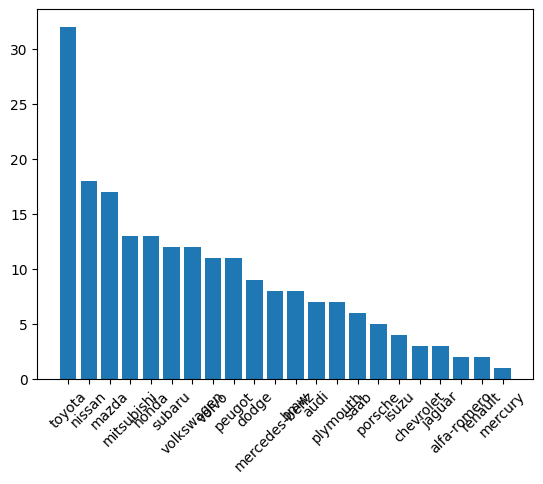

In [63]:
plt.bar(makers, model_count)
plt.xticks(rotation=45)
plt.show()

In [64]:
df[['make', 'fuel-type']].groupby(['make', 'fuel-type']).size().reset_index()

,make,fuel-type,0
0,alfa-romero,gas,2
1,audi,gas,7
2,bmw,gas,8
3,chevrolet,gas,3
4,dodge,gas,9
5,honda,gas,13
6,isuzu,gas,4
7,jaguar,gas,3
8,mazda,diesel,2
9,mazda,gas,15


In [65]:
make_price = df[['make', 'price']].sort_values(by = ['price'], ascending = False)
make_price.head()

,make,price
73,mercedes-benz,45400.0
15,bmw,41315.0
72,mercedes-benz,40960.0
127,porsche,37028.0
16,bmw,36880.0


In [66]:
make_price.tail()

,make,price
75,mitsubishi,5389.0
149,toyota,5348.0
49,mazda,5195.0
17,chevrolet,5151.0
137,subaru,5118.0


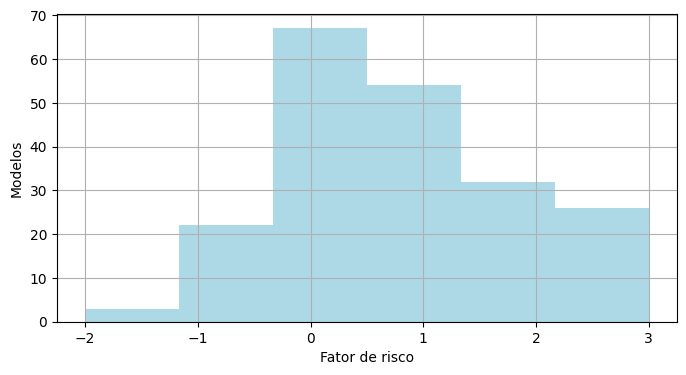

In [69]:
plt.figure(figsize=(8,4))
plt.hist(df['symboling'], bins = 6, color = 'lightblue')
plt.xlabel('Fator de risco')
plt.ylabel('Modelos')
plt.grid()
plt.show()

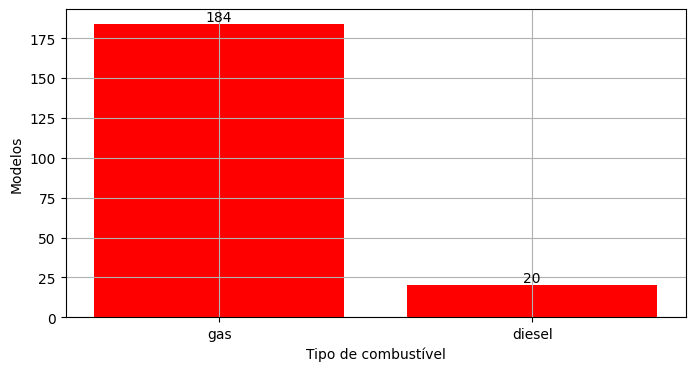

In [70]:
x = df['fuel-type'].value_counts().index
y = df['fuel-type'].value_counts().values

plt.figure(figsize=(8,4))
plt.bar(x, y, color = 'red')
plt.xlabel('Tipo de combustível')
plt.ylabel('Modelos')

for i, j in enumerate(y):
    plt.text(i, j, str(j), ha='center', va='bottom')
    
plt.grid()
plt.show()

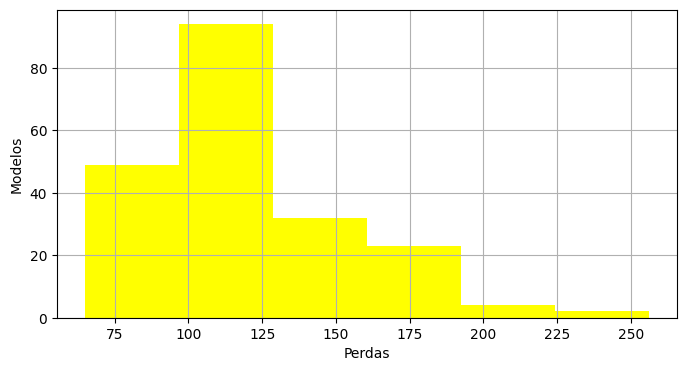

In [71]:
plt.figure(figsize=(8,4))
plt.hist(df['normalized-losses'], bins = 6, color = 'yellow')
plt.xlabel('Perdas')
plt.ylabel('Modelos')
plt.grid()
plt.show()

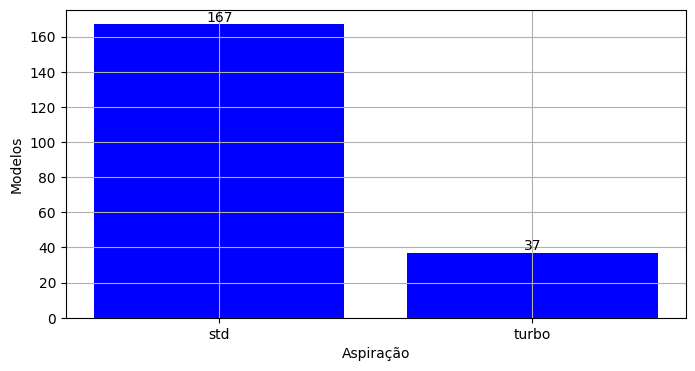

In [72]:
x = df['aspiration'].value_counts().index
y = df['aspiration'].value_counts().values

plt.figure(figsize=(8,4))
plt.bar(x, y, color='blue')
plt.xlabel('Aspiração')
plt.ylabel('Modelos')

for i, j in enumerate(y):
  plt.text(i, j, str(j), ha='center', va='bottom')

plt.grid()
plt.show()

In [73]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horse-power', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

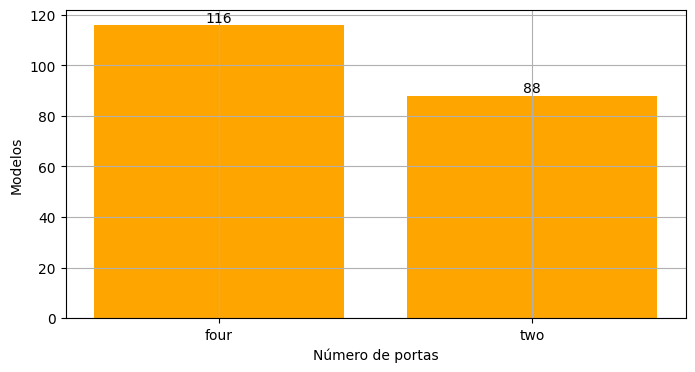

In [74]:
x = df['num-of-doors'].value_counts().index
y = df['num-of-doors'].value_counts().values

plt.figure(figsize=(8,4))
plt.bar(x, y, color='orange')
plt.xlabel('Número de portas')
plt.ylabel('Modelos')

for i, j in enumerate(y):
  plt.text(i, j, str(j), ha='center', va='bottom')

plt.grid()
plt.show()

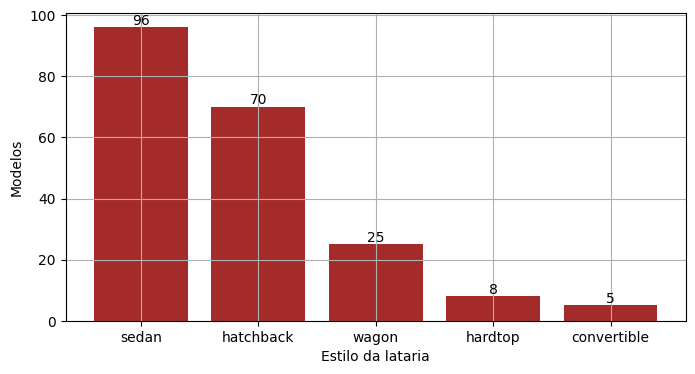

In [75]:
x = df['body-style'].value_counts().index
y = df['body-style'].value_counts().values

plt.figure(figsize=(8,4))
plt.bar(x, y, color='brown')
plt.xlabel('Estilo da lataria')
plt.ylabel('Modelos')

for i, j in enumerate(y):
  plt.text(i, j, str(j), ha='center', va='bottom')

plt.grid()
plt.show()

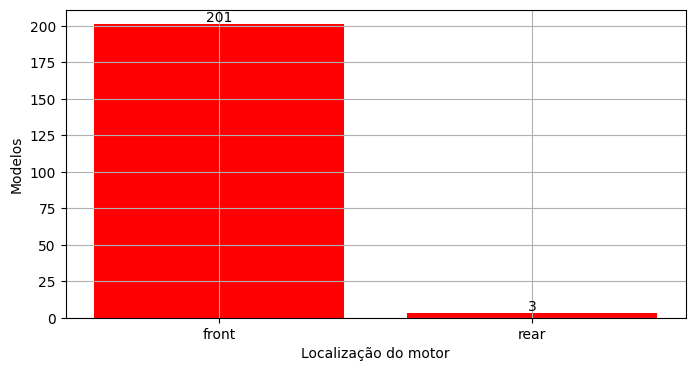

In [76]:
x = df['engine-location'].value_counts().index
y = df['engine-location'].value_counts().values

plt.figure(figsize=(8,4))
plt.bar(x, y, color='red')
plt.xlabel('Localização do motor')
plt.ylabel('Modelos')

for i, j in enumerate(y):
  plt.text(i, j, str(j), ha='center', va='bottom')

plt.grid()
plt.show()

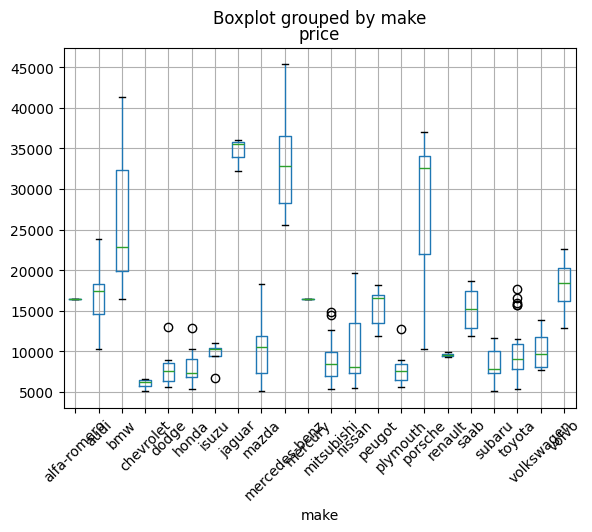

In [77]:
df.boxplot('price', by = 'make')
plt.xticks(rotation=45)
plt.show()

In [78]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horse-power', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

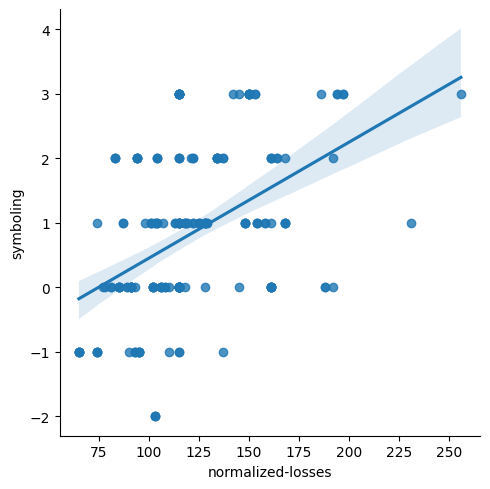

In [80]:
sns.lmplot(x = 'normalized-losses', y = 'symboling', data = df)

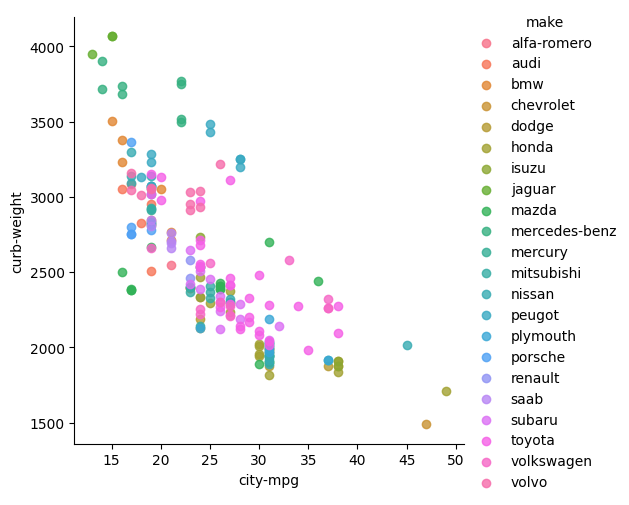

In [81]:
sns.lmplot(x='city-mpg', y='curb-weight', data=df, hue='make', fit_reg=False)

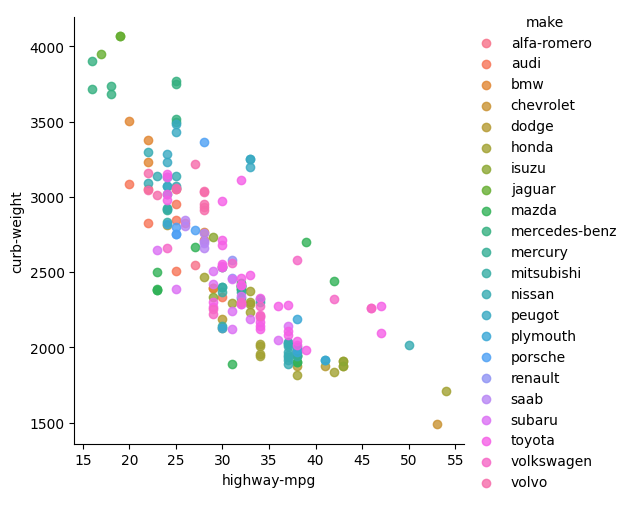

In [82]:
sns.lmplot(x='highway-mpg', y='curb-weight', data=df, hue='make', fit_reg=False)

Encoding Categórico

In [84]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horse-power,peak-rpm,city-mpg,highway-mpg,price
0,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
1,1,115,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
4,2,115,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0


In [85]:
df['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

In [86]:
df['fuel-type']=df['fuel-type'].map({'gas':1, 'diesel':2})

In [87]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [88]:
df['aspiration']=df['aspiration'].map({'std':1, 'turbo':2})

In [89]:
df['num-of-doors'].unique()

array(['two', 'four'], dtype=object)

In [90]:
df['num-of-doors']=df['num-of-doors'].map({'two':2, 'four':4})

In [91]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [92]:
df['drive-wheels']=df['drive-wheels'].map({'rwd':1, 'fwd':2, '4wd':3})

In [93]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horse-power,peak-rpm,city-mpg,highway-mpg,price
0,3,115,alfa-romero,1,1,2,convertible,1,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
1,1,115,alfa-romero,1,1,2,hatchback,1,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
2,2,164,audi,1,1,4,sedan,2,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
3,2,164,audi,1,1,4,sedan,3,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
4,2,115,audi,1,1,2,sedan,2,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0


In [94]:
df['engine-size'].unique()

array([130, 152, 109, 136, 131, 108, 164, 209,  61,  90,  98, 122, 156,
        92,  79, 110, 111, 119, 258, 326,  91,  70,  80, 140, 134, 183,
       234, 308, 304,  97, 103, 120, 181, 151, 194, 203, 132, 121, 146,
       171, 161, 141, 173, 145])

In [95]:
df['engine-location']=df['engine-location'].map({'front':1, 'rear':2})

In [96]:
df['num-of-cylinders'].value_counts().index

Index(['four', 'six', 'five', 'eight', 'two', 'twelve', 'three'], dtype='object', name='num-of-cylinders')

In [97]:
df['num-of-cylinders']=df['num-of-cylinders'].map({'four':3, 'six':5, 'five':4, 'three':2, 'twelve':7, 'two':1, 'eight':6})

In [98]:
df['fuel-system'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [99]:
df['fuel-system']=df['fuel-system'].map({'mpfi':1, '2bbl':2, 'mfi':3, '1bbl':4, 'spfi':5, '4bbl':6, 'idi':7, 'spdi':8})

In [ ]:
df['engine-type'].unique()

In [100]:
df['engine-type']=df['engine-type'].map({'dohc':1, 'ohcv':2, 'ohc':3, 'l':4, 'rotor':5, 'ohcf':6, 'dohcv':7})

In [101]:
df['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [102]:
df['body-style']=df['body-style'].map({'convertible':1, 'hatchback':2, 'sedan':3, 'wagon':4, 'hardtop':5})

In [105]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['make']=le.fit_transform(df['make'])

In [106]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horse-power,peak-rpm,city-mpg,highway-mpg,price
0,3,115,0,1,1,2,1,1,1,88.6,...,130,1,3.47,2.68,9.0,111,5000,21,27,16500.0
1,1,115,0,1,1,2,2,1,1,94.5,...,152,1,2.68,3.47,9.0,154,5000,19,26,16500.0
2,2,164,1,1,1,4,3,2,1,99.8,...,109,1,3.19,3.40,10.0,102,5500,24,30,13950.0
3,2,164,1,1,1,4,3,3,1,99.4,...,136,1,3.19,3.40,8.0,115,5500,18,22,17450.0
4,2,115,1,1,1,2,3,2,1,99.8,...,136,1,3.19,3.40,8.5,110,5500,19,25,15250.0


Seleção de Features

Matriz de Correlação e Mapa de Calor

Não é necessário usar dados escalonados ao calcular a matriz de correlação.
Como a correlação representa a força e a direção da correlação de 2 variáveis independentes, escalá-las não afeta os coeficientes.

In [107]:
cor = df.corr(method='spearman')
cmap = sns.diverging_palette(230, 30, as_cmap=True)

<Axes: >

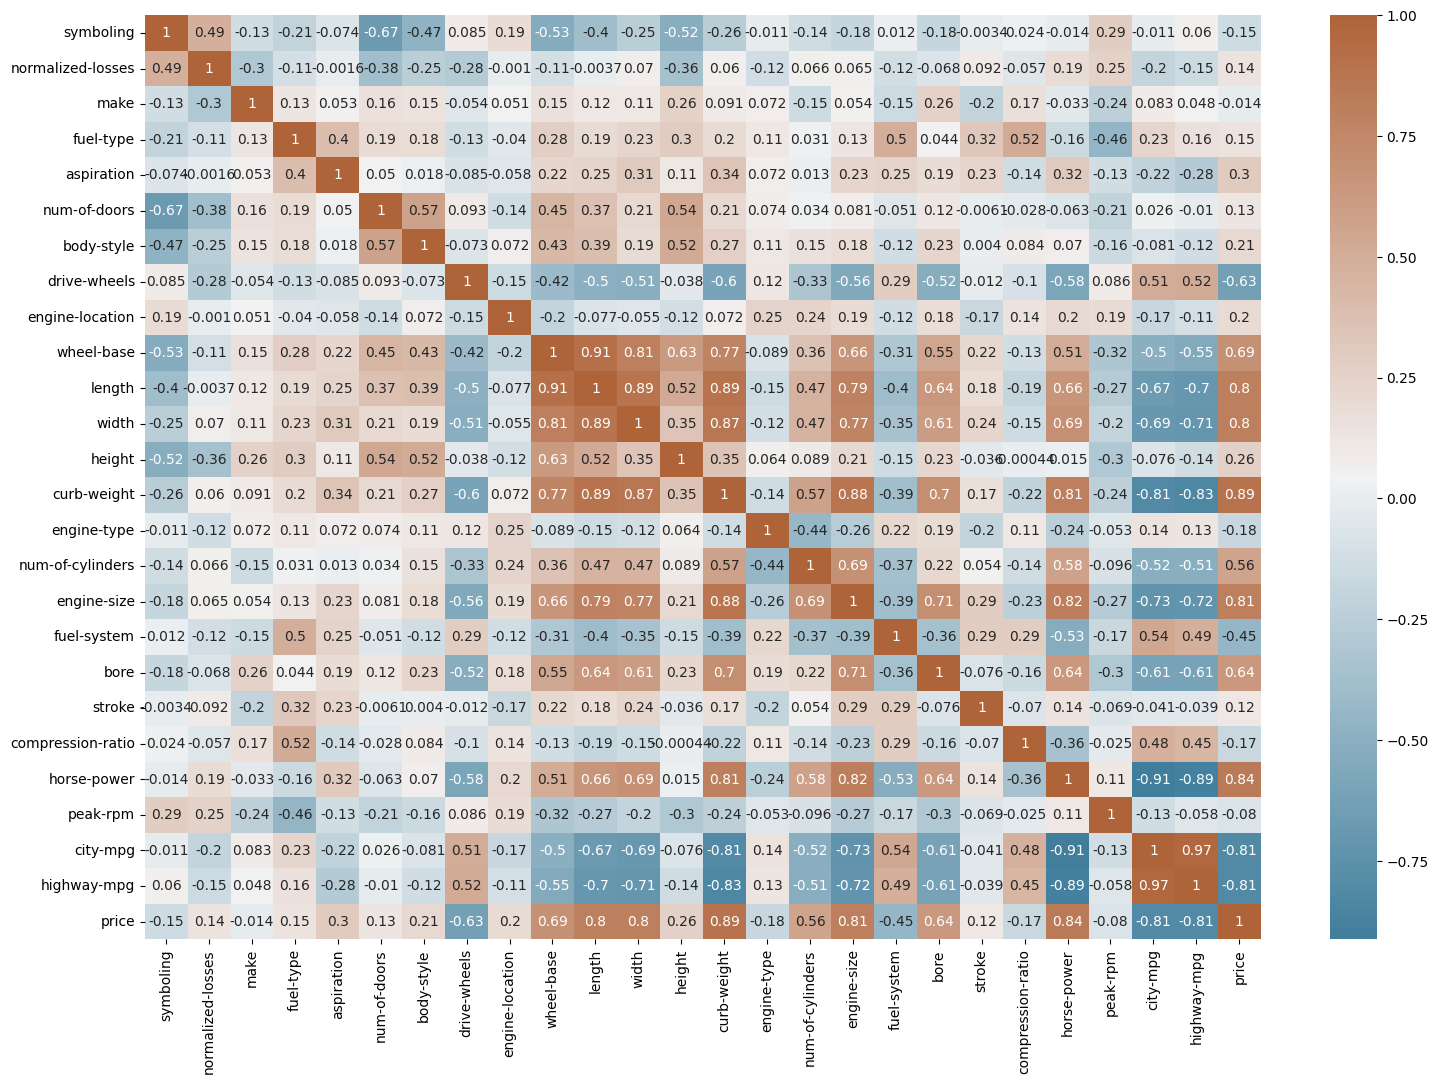

In [108]:
plt.figure(figsize=(18,12))
sns.heatmap(cor, cmap=cmap, annot = True)

Análise Invariada

Os testes estatísticos invariados são normalmente aplicados individualmente para cada recurso.
Eles avaliam a relação entre esse recurso perticular e a variável alvo individualmente. Esses métodos avaliam a significância ou relevância estatística de cada feature com base em sua própria distribuição e features, sem considerar as relações com outras features.
Portanto, os testes focam apenas naquele recurso específico e não na relação entre dois ou mais recursos independentes.
Portanto, dados dimensionados não são necessários.

In [109]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [110]:
xdf = pd.DataFrame(X, columns=['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'])
ydf = pd.DataFrame(y, columns=['price'])

In [111]:
column_to_scale = xdf['symboling'].values.reshape(-1,1)

In [112]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
xdf['symboling']=ms.fit_transform(column_to_scale)

In [113]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
kbest = SelectKBest(score_func=chi2, k=25)
fit = kbest.fit(xdf.values, y)

In [114]:
ua_scores = pd.DataFrame(fit.scores_)
ua_columns = pd.DataFrame(xdf.columns)

In [115]:
ua_rank_df = pd.concat([ua_columns, ua_scores]
                       , axis=1)

In [116]:
ua_rank_df.columns=['col_name', 'score']
ua_rank_df.sort_values(by='score', ascending=False)

,col_name,score
13,curb-weight,20892.350677
22,peak-rpm,8893.369030
21,horsepower,2739.383279
16,engine-size,2714.833887
1,normalized-losses,1685.699935
2,make,603.370400
17,fuel-system,369.355030
23,city-mpg,324.085453
24,highway-mpg,299.521905
20,compression-ratio,298.290944


In [117]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [118]:
et_scores = pd.DataFrame(model.feature_importances_)
et_columns = pd.DataFrame(xdf.columns)

In [119]:
et_rank_df = pd.concat([et_columns, et_scores]
                       , axis=1)
et_rank_df.columns=['col_name', 'score']
et_rank_df.sort_values(by='score', ascending=False)

,col_name,score
13,curb-weight,0.193787
23,city-mpg,0.060929
12,height,0.060803
1,normalized-losses,0.059843
6,body-style,0.058479
24,highway-mpg,0.049457
10,length,0.042034
21,horsepower,0.038813
9,wheel-base,0.038715
18,bore,0.038152


In [120]:
xdf.drop(['engine-location', 'symboling', 'aspiration','stroke'], axis=1, inplace=True)

In [122]:
df_x = xdf.copy(deep=True)

In [123]:
X = df_x.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [125]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
Xsc_train = sc1.fit_transform(X_train)
Xsc_test = sc1.transform(X_test)

In [126]:
ysc_train = y_train.reshape(len(y_train), 1)
ysc_test = y_test.reshape(len(y_test), 1)

In [127]:
sc2 = StandardScaler()
ysc_train = sc2.fit_transform(ysc_train)
ysc_test = sc2.transform(ysc_test)

In [128]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=4, kernel='rbf')
xsctrain_dr = kpca.fit_transform(Xsc_train)
xsctest_dr = kpca.transform(Xsc_test)

In [129]:
def r2_adj(r, x, y):
  r2 = r.score(x, y)
  n=x.shape[0]
  p=x.shape[1]
  adjr2 = 1-((1-r2)*(n-1)/(n-p-1))
  return adjr2

In [130]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [131]:
r2_adj(reg, X_test, y_test)

0.5114648374232571

In [132]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=reg, X=X_train, y=y_train, cv=10)

In [133]:
print(accuracies.mean()*100)

66.51585010649495


In [134]:
print(accuracies.std()*100)

25.544468171952094


In [135]:
from sklearn.svm import SVR
sv_reg = SVR(kernel='rbf')
sv_reg.fit(Xsc_train, ysc_train)

C:\Users\alvin\PycharmProjects\linear_regression_learning\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [136]:
r2_adj(sv_reg, Xsc_test, ysc_test)

0.7045482494121944

In [137]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=sv_reg, X=Xsc_train, y=ysc_train, cv=10)

C:\Users\alvin\PycharmProjects\linear_regression_learning\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alvin\PycharmProjects\linear_regression_learning\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alvin\PycharmProjects\linear_regression_learning\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alvin\PycharmProjects\linear_regression_learning\.venv\Lib\site-packages\skl

In [138]:
print(accuracies.mean()*100)

76.68744764601533


In [139]:
print(accuracies.std()*100)

16.217099666922646


In [140]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state = 0)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [141]:
r2_adj(dt_reg, X_test, y_test)

0.8194656061203578

In [142]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=dt_reg, X=X_train, y=y_train, cv=10)

In [143]:
print(accuracies.mean()*100)

73.3805664258746


In [144]:
print(accuracies.std()*100)

40.45954550834811
